<a href="https://colab.research.google.com/github/JustMatthew989/Matvey_Mokritskikh_Repo/blob/main/%D0%94%D0%97_%D0%9B%D0%BE%D0%B3%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D0%B8%D1%8F_%D0%9C%D0%BE%D0%BA%D1%80%D0%B8%D1%86%D0%BA%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ДОМАШНЕЕ ЗАДАНИЕ "Логистическая регрессия"

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
import numpy as np
from sklearn.preprocessing import LabelEncoder,PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [ ]:
df = pd.DataFrame(pd.read_csv(r'C:\Users\snady\.spyder-py3\credit_risk_dataset.csv'))

In [ ]:
df.describe(include='all')

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,RENT,NaN,EDUCATION,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [ ]:
print(df.shape)
df.isnull().sum().sort_values(ascending=False)

(32581, 12)


loan_int_rate                 3116
person_emp_length              895
person_age                       0
person_income                    0
person_home_ownership            0
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32416 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32416 non-null  int64  
 1   person_income               32416 non-null  int64  
 2   person_home_ownership       32416 non-null  object 
 3   person_emp_length           31529 non-null  float64
 4   loan_intent                 32416 non-null  object 
 5   loan_grade                  32416 non-null  object 
 6   loan_amnt                   32416 non-null  int64  
 7   loan_int_rate               29321 non-null  float64
 8   loan_status                 32416 non-null  int64  
 9   loan_percent_income         32416 non-null  float64
 10  cb_person_default_on_file   32416 non-null  object 
 11  cb_person_cred_hist_length  32416 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.2+ MB


In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
lab_encoder = LabelEncoder()
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = lab_encoder.fit_transform(df[i])
        label_mapping = dict(zip(lab_encoder.classes_, lab_encoder.transform(lab_encoder.classes_)))
        print(label_mapping)

{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}
{'DEBTCONSOLIDATION': 0, 'EDUCATION': 1, 'HOMEIMPROVEMENT': 2, 'MEDICAL': 3, 'PERSONAL': 4, 'VENTURE': 5}
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}
{'N': 0, 'Y': 1}


In [ ]:
df['loan_amnt'] = np.log1p(df['loan_amnt'])

In [ ]:
df['cb_person_cred_hist_length'] = np.log1p(df['cb_person_cred_hist_length'])

In [ ]:
df['loan_percent_income'] = np.log1p(df['loan_percent_income'])

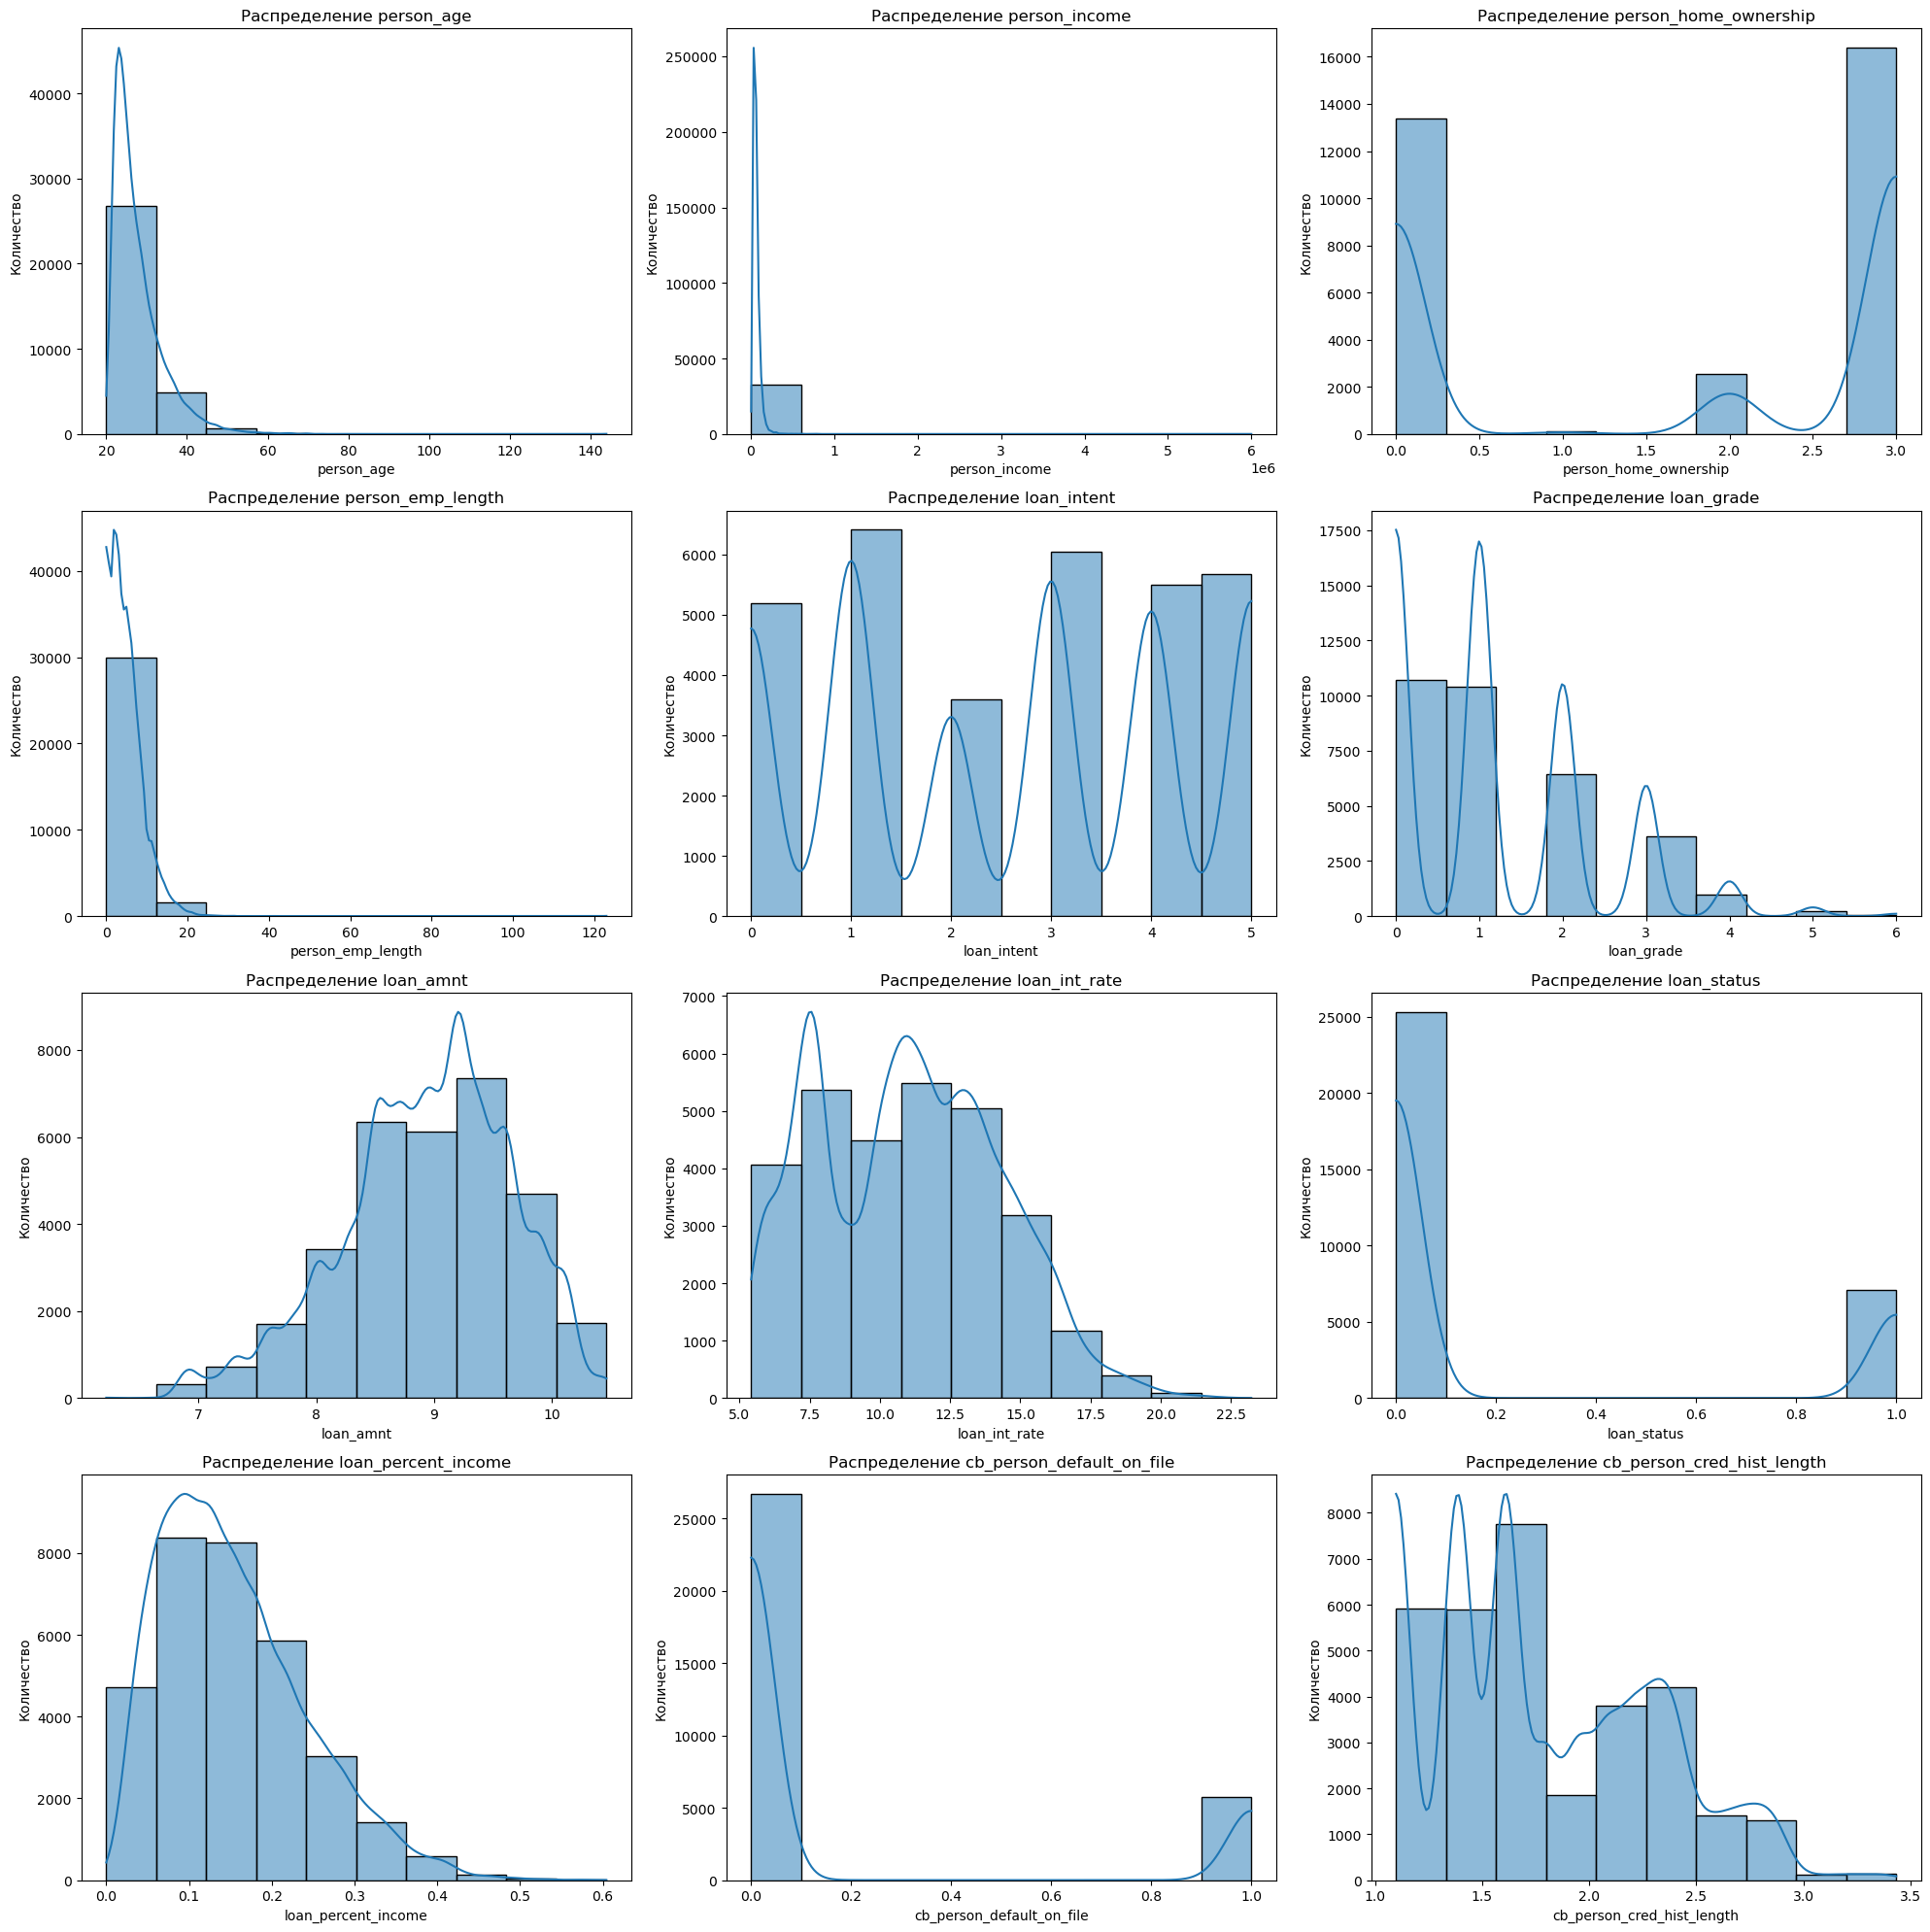

In [ ]:
plt.figure(figsize=(20, 20))
features = df.columns

for i, feature in enumerate(features):
    plt.subplot(4, 3, i + 1)  #4 строки и 3 столбца
    if df[feature].dtype == 'object':  #Для категориальных признаков
        sns.countplot(data=df, x=feature)
        plt.title(f'Распределение по {feature}')
        plt.xticks(rotation=45)
    else:  #Для числовых признаков
        sns.histplot(df[feature], bins=10, kde=True)
        plt.title(f'Распределение {feature}')

    plt.xlabel(feature)
    plt.ylabel('Количество')

plt.tight_layout()
plt.show()

C:\Users\snady\AppData\Local\Temp\ipykernel_15476\3066965277.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', ax=axes[i])
C:\Users\snady\AppData\Local\Temp\ipykernel_15476\3066965277.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', ax=axes[i])
C:\Users\snady\AppData\Local\Temp\ipykernel_15476\3066965277.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette=

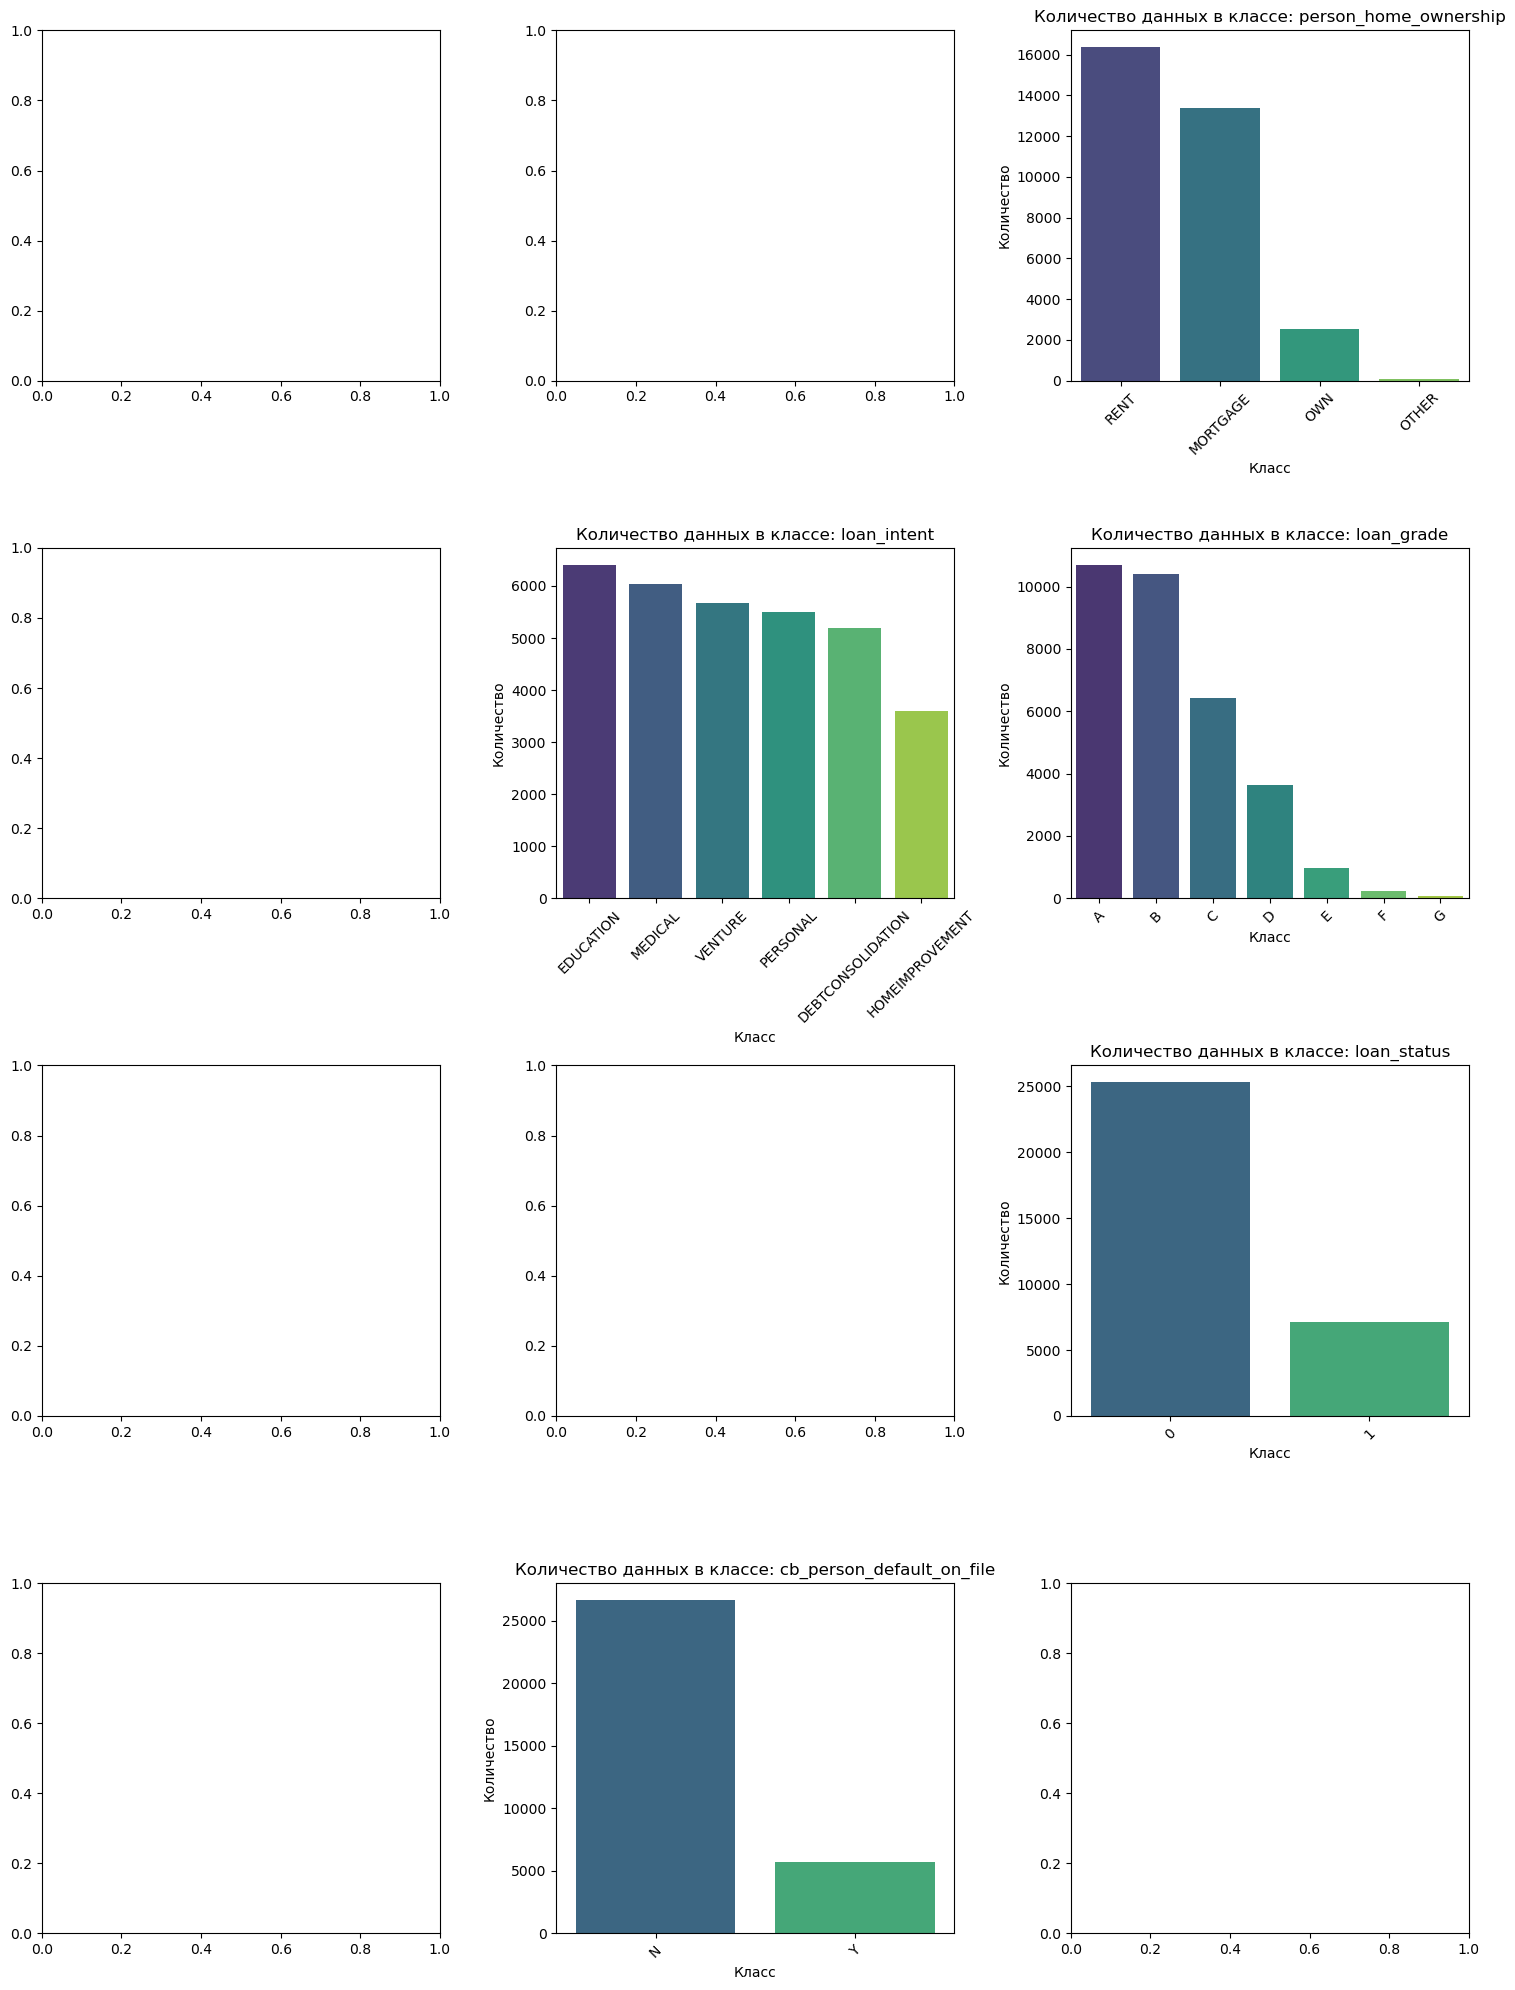

In [ ]:
num_columns = len(df.columns)
cols = 3
rows = (num_columns + cols - 1) // cols


fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
axes = axes.flatten()

for i, column in enumerate(df.columns):

    if df[column].dtype == 'object' or df[column].nunique() < 20:
        class_counts = df[column].value_counts()
        sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis', ax=axes[i])
        axes[i].set_title(f'Количество данных в классе: {column}')
        axes[i].set_xlabel('Класс')
        axes[i].set_ylabel('Количество')
        axes[i].tick_params(axis='x', rotation=45)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

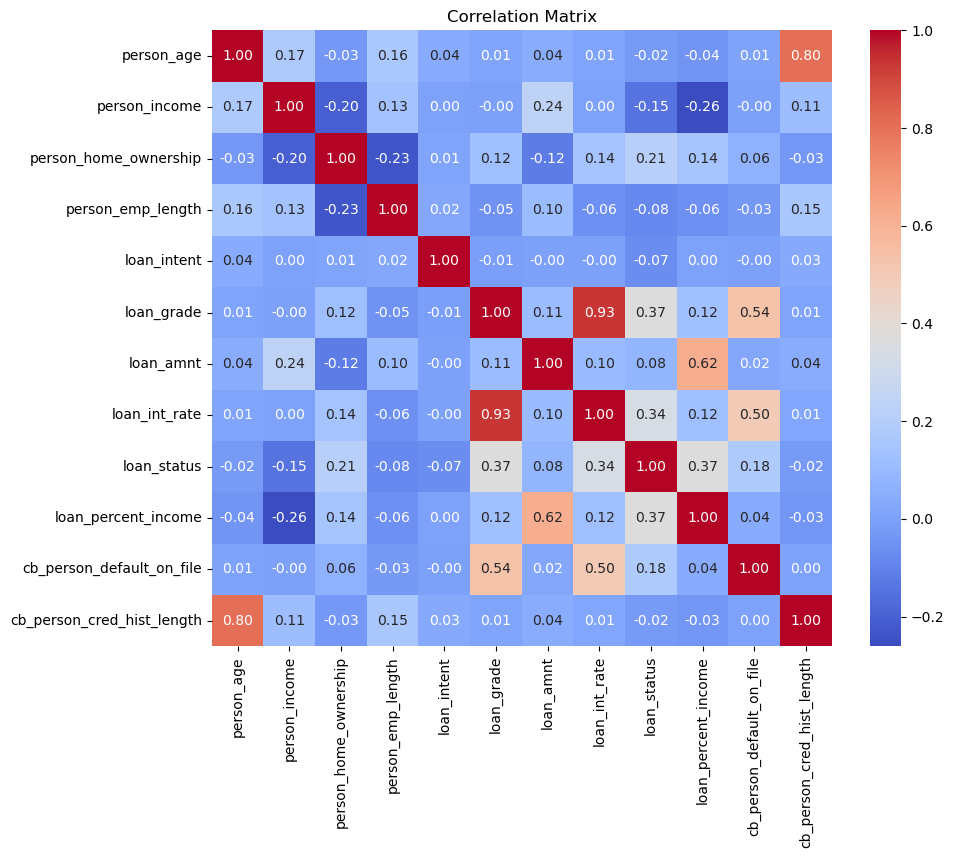

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X = X.fillna(X.mean())


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = MinMaxScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
#К test я применяю только трансформ дабы избежать утечки данных
X_test_normalized = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

In [ ]:
model = LogisticRegression(max_iter=500)
model.fit(X_train_normalized, y_train)
y_pred = model.predict(X_test_normalized)

#Оцениваю модель
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Precision: {precision:.2f}')

Accuracy: 0.85
F1 Score: 0.83
Recall: 0.85
Precision: 0.84


In [ ]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,10.463132,16.02,1,0.463734,1,1.386294
1,21,9600,2,5.0,1,1,6.908755,11.14,0,0.095310,0,1.098612
2,25,9600,0,1.0,3,2,8.612685,12.87,1,0.451076,0,1.386294
3,23,65500,3,4.0,3,2,10.463132,15.23,1,0.425268,0,1.098612
4,24,54400,3,8.0,3,2,10.463132,14.27,1,0.438255,1,1.609438


c:\Users\snady\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)